In [2]:
%matplotlib inline

In [3]:
from pylab import imshow

In [4]:
import numpy as np

In [5]:
import cv2

In [6]:
import torch

In [7]:
import albumentations as albu

In [8]:
!pip install iglovikov_helper_functions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 917.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jpeg4py: filename=jpeg4py-0.1.4-py3-none-any.whl size=8424 sha256=1e6b84f80b1c2bd19276998d0dc31caafc47b6b87d2f7107b1f18781e7ee3f2c
  Stored in directory: /root/.cache/pip/wheels/86/c3/0f/348e6cadb3a27435e833d21d91707d653fb159d69f2a867a36
Successfully built jpeg4py


In [9]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [10]:
!wget https://habrastorage.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg > /dev/null

--2023-11-04 12:06:26--  https://habrastorage.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg
Resolving habrastorage.org (habrastorage.org)... 51.89.30.72
Connecting to habrastorage.org (habrastorage.org)|51.89.30.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55211 (54K) [image/jpeg]
Saving to: ‘eml7crxnxftrimsmolwjegqcrp4.jpeg’

eml7crxnxftrimsmolw 100%[===================>]  53.92K   355KB/s    in 0.2s    

2023-11-04 12:06:27 (355 KB/s) - ‘eml7crxnxftrimsmolwjegqcrp4.jpeg’ saved [55211/55211]



In [11]:
!pip install cloths_segmentation  > /dev/null

In [12]:
from cloths_segmentation.pre_trained_models import create_model

In [13]:
model = create_model("Unet_2020-10-30")

Downloading: "https://github.com/ternaus/cloths_segmentation/releases/download/0.0.1/weights.zip" to /root/.cache/torch/hub/checkpoints/weights.zip
100%|██████████| 47.0M/47.0M [00:00<00:00, 55.4MB/s]
/usr/local/lib/python3.10/dist-packages/torch/hub.py:682: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


In [14]:
model.eval();

In [27]:
image = load_rgb("/content/sample_data/ni1.jpeg")

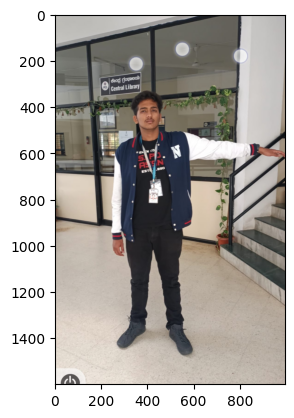

In [28]:
imshow(image)

In [29]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)

In [30]:
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)

In [31]:
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

In [32]:
with torch.no_grad():
  prediction = model(x)[0][0]

In [33]:
mask = (prediction > 0).cpu().numpy().astype(np.uint8)

In [34]:
mask = unpad(mask, pads)

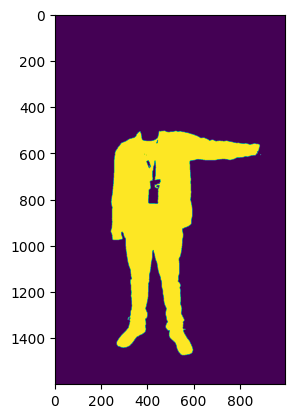

In [37]:
imshow(mask)

In [47]:
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 0)).astype(np.uint8), 0.5, 0)

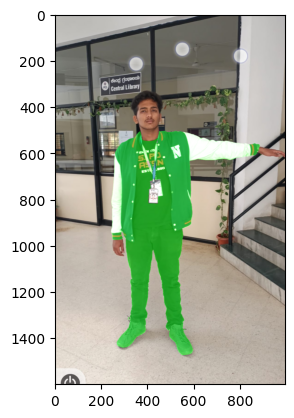

In [48]:
imshow(dst)

In [40]:
abc=cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255

In [43]:
import cv2

# Assuming 'mask' is a NumPy array containing your image
# Replace 'output_image.png' with the desired file name
cv2.imwrite('output_image.png', mask)

True

In [49]:
from PIL import Image

# Assuming 'abc' contains the image data as a NumPy array or a Pillow image
im = Image.fromarray(dst)  # If 'abc' is a NumPy array
# If 'abc' is already a Pillow image, you can directly use it without 'Image.fromarray'

# Save the image as a JPEG file with the name "your_file.jpeg"
im.save("your_file.jpeg")
